# Games played

## Analysis of an (especially?) unlucky season of fantasy basketball (2021-2022)

The season is over. And it ended badly. With a regular season of 5 wins and 11 losses that is good for second to last place in the standings.

To exorcize what seemed a damned fantasy season, I decided to search for the cause of the horrible performance of my fantasy team. I started from the hypothesis that perhaps I've been spectacularly unlucky with the injuries, that if only my (best) players had been healthier things would have gone differently. I set out to test this hypothesis.

First of all, I'll import all the relevant packages for this project and define the path to the datasets.

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
%matplotlib inline

# set path to data files
path_to_data = '/Users/giacomo/Postdoc_BMI_UWO/python/games-played'

Next, I need to clean and combine the individual datasets. I have one .csv file per team (e.g., "MVB_T.csv"), but to make comparisons across teams, I want to have a single dataframe that includes data from all the teams. Also, in new columns, I want to add information about fantasy team membership and draft rank for each player (draft rank overall, and rank per team). Draft rank can be extracted from a different .csv file called "draft.csv". 

In [322]:
# load, clean, and combine datasets

## loop through files for each team
for file in os.listdir(path_to_data):
    fname = os.fsdecode(file)
    if fname.endswith('MVB_T.xlsx'):
        
        ## create dataframe 
        df = pd.read_excel(fname)
        # remove NaN entries
        df = df[pd.isnull(df.Player)==False]
        
        ## add info about team name
        team_name = [fname[0:-7:]] * len(df)
        df.insert(loc=4, column='FantasyTeam', value=team_name)
        
        ## add info about draft rank and bid amount
        draft = pd.read_excel(os.path.join(path_to_data, 'draft.xlsx'))
        # loop through players on team and extract info
        draft_rank_overall = np.zeros([len(df)])
        draft_bid = np.zeros([len(df)])        
        for i in range(len(df)):
            player = draft.loc[draft['Player'] == df.Player[i]]            
            # check if player has been drafted      
            if len(player)>0:    
                draft_rank_overall[i] = player['Pick'].values[0]
                draft_bid[i] = player['Bid'].values[0]
            else:
                draft_rank_overall[i] = 0
                draft_bid[i] = 0
        # check if player has been drafted by the same fantasy team
        f_team = draft['Fantasy Team'][draft.Bid==draft_bid.max()].values
        full_team_name = []
        for i in range(len(df)):
            full_team_name.append(f_team)
            this_team = draft['Fantasy Team'][draft['Player'] == df.Player[i]].values
            if this_team==f_team:
                continue
            else:
                draft_rank_overall[i] = 0
                draft_bid[i] = 0
        sorted_rank=np.sort(draft_rank_overall)
        draft_rank_team = np.zeros(len(draft_rank_overall))    
        c = 1
        for j in range(len(draft_rank_overall)):
            if sorted_rank[j]==0:
                continue
            else:
                draft_rank_team[[sorted_rank[j]==draft_rank_overall]] = c 
                c = c+1                    
        # insert new columns in original dataframe
        df.insert(loc=5, column='FullName', value=full_team_name)
        df.insert(loc=6, column='DraftRankTeam', value=draft_rank_team)
        df.insert(loc=7, column='DraftRankOverall', value=draft_rank_overall)
        df.insert(loc=8, column='DraftBid', value=draft_bid)
        display(df.head())
        
        # sanity check! max num of draft rank team should be 11!!
        





        
        
        
        
        
        
        
        #print(df.iloc[df.DraftRankOverall.sort_values])
        #print(temp)
        #pd.ilo(draft_rank_overall)
        #print(draft_rank_overall)
        #draft_rank_team = draft_rank_overall.sort()
        
        
        
        
            #draft_rank_overall[i,0] = player.Pick.values[i]
            #draft_bid[i,0] = player.Bid.values
        
        
        
        #display(draft.head())
        
        #print(draft['Player'])
        #print(df['Player'])
        #print(draft.loc[draft['Player'] == df['Player']])
        
        #temp = draft['Player'].filter(item=df['Player']) 
        #print(temp)
        ### search by player name
        
        
        ## create multi-team df by append
        
        
            

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


,ID,Pos,Player,Team,FantasyTeam,FullName,DraftRankTeam,DraftRankOverall,DraftBid,Eligible,...,FTM,FTA,OREB,DREB,2DO,3D,PF,TF,FF,EJ
0,*051pa*,PG,Kevin Porter,HOU,MVB,[Masonville Graveyard],7.0,75.0,19.0,"PG,SG,G,SF,F,Flx",...,1.9,3.3,0.7,3.1,4.0,0.0,2.6,5.0,1.0,1.0
1,*031lx*,SG,CJ McCollum,POR,MVB,[Masonville Graveyard],5.0,38.0,15.0,"PG,SG,G,Flx",...,1.3,1.9,0.9,3.3,1.0,0.0,2.1,2.0,2.0,0.0
2,*051p8*,G,Jordan Poole,GS,MVB,[Masonville Graveyard],0.0,0.0,0.0,"PG,SG,G,Flx",...,3.5,3.9,0.4,3.0,0.0,0.0,2.7,1.0,0.0,0.0
3,*027pe*,SF,Jimmy Butler,MIA,MVB,[Masonville Graveyard],2.0,16.0,36.0,"SF,PF,F,Flx",...,7.0,7.9,1.9,4.4,6.0,4.0,1.4,6.0,0.0,1.0
4,*051p9*,PF,Keldon Johnson,SA,MVB,[Masonville Graveyard],10.0,94.0,14.0,"SF,PF,F,Flx",...,1.9,2.7,1.1,5.2,5.0,0.0,2.0,0.0,0.0,0.0


In [19]:
# define calc function
def games_played(fpg=21.0, drk=8, fcn=np.sum):
    
    # loop through files for each team
    for file in os.listdir(path_to_data):
        fname = os.fsdecode(file)
        print(fname)
        if fname.endswith('.xlsx'):
            df = pd.read_excel(fname)
            df.head()
            # extract information
            if fpg > 0:
                df.GP = df.GP[(df.FPg>=fpg)] 
            if drk > 0:
                df.GP = df.GP[(df.DraftRank>=drk)]

            # summarize information
            res = fcn(df.GP)
            print(res)
    
    # return information
    return res

In [20]:
# test the function
games_played()

.DS_Store
test.xlsx
0.0
.ipynb_checkpoints
Fantrax-Players-Honolulu League.csv
games-played.ipynb


0.0

In [18]:
# plot the results

In [1]:
# add randomization test (shuffle team-player labels 1000 times look at the distribution of games played)

In [3]:
ds=pd.read_csv("Fantrax-Players-Honolulu League.csv")
print(ds.shape)
ds.head()

(1520, 25)


,ID,Player,Team,Position,RkOv,Status,Opponent,FPts,FP/G,% Rostered,...,PTS,OREB,DREB,AST,ST,BLK,TO,TF,FF,EJ
0,*03e75*,Nikola Jokic,DEN,"PF,F,C,Flx",1,CVZ,@UTA<br/>Wed 10:00PM,2006.1,44.58,100%,...,"1,167",122,498,352,64,33,162,8,0,2
1,*031m2*,Giannis Antetokounmpo,MIL,"PF,F,C,Flx",2,-1-,NaN,1782.2,41.45,100%,...,"1,242",79,407,256,43,61,150,1,0,0
2,*01enh*,Stephen Curry,GS,"PG,SG,G,Flx",3,STLP,NaN,1623.8,34.55,100%,...,"1,222",30,227,297,69,21,152,1,0,0
3,*042nq*,Dejounte Murray,SA,"PG,SG,G,Flx",4,SAM,NaN,1619.1,35.20,100%,...,901,61,328,420,93,17,117,1,0,0
4,*03xmv*,Jayson Tatum,BOS,"SF,PF,F,Flx",5,STLP,CHA<br/>Wed 7:30PM,1607.9,33.50,100%,...,"1,250",56,352,193,45,36,142,6,0,0


In [10]:
ds=ds.rename(columns={"FP/G": "FPg", "+/-": "plusminus", "% Rostered": "pctRostered"})
list(ds.columns)

['ID',
 'Player',
 'Team',
 'Position',
 'RkOv',
 'Status',
 'Opponent',
 'FPts',
 'FPg',
 'pctRostered',
 'plusminus',
 'GP',
 'FG-',
 '3PTA',
 'FT-',
 'PTS',
 'OREB',
 'DREB',
 'AST',
 'ST',
 'BLK',
 'TO',
 'TF',
 'FF',
 'EJ']

Text(0,0.5,'Number of games played (FP/G>=21)')

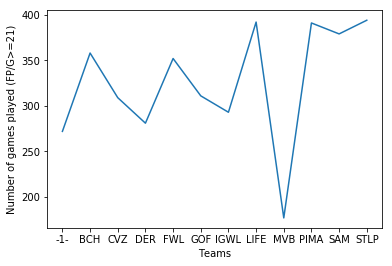

In [11]:
gp_by_team=ds.GP[ds.FPg>=21].groupby(ds.Status[ds.Status!='FA'])
plt.plot(gp_by_team.sum())
plt.xlabel('Teams')
plt.ylabel('Number of games played (FP/G>=21)')

In [41]:
df=pd.read_excel("test.xlsx")
print(df.shape)
df.head()
list(df.columns)

(42, 23)


['Pos',
 'Player',
 'Team',
 'FantasyTeam',
 'DraftRank',
 'Eligible',
 'Status',
 'Fpts',
 'FPg',
 'GP',
 'FG-',
 '3PTA',
 'FT-',
 'PTS',
 'OREB',
 'DREB',
 'AST',
 'ST',
 'BLK',
 'TO',
 'TF',
 'FF',
 'EJ']

In [42]:
df.GP[(df.DraftRank<9) & (df.DraftRank>0)].sum()

229.0

In [39]:
cwd=%pwd
import os
directory = os.fsencode(cwd)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'): 
        print(filename)
        df=pd.read_csv(filename)
df.head()

Fantrax-Players-Honolulu League.csv


,ID,Player,Team,Position,RkOv,Status,Opponent,FPts,FP/G,% Rostered,...,PTS,OREB,DREB,AST,ST,BLK,TO,TF,FF,EJ
0,*03e75*,Nikola Jokic,DEN,"PF,F,C,Flx",1,CVZ,@UTA<br/>Wed 10:00PM,2006.1,44.58,100%,...,"1,167",122,498,352,64,33,162,8,0,2
1,*031m2*,Giannis Antetokounmpo,MIL,"PF,F,C,Flx",2,-1-,NaN,1782.2,41.45,100%,...,"1,242",79,407,256,43,61,150,1,0,0
2,*01enh*,Stephen Curry,GS,"PG,SG,G,Flx",3,STLP,NaN,1623.8,34.55,100%,...,"1,222",30,227,297,69,21,152,1,0,0
3,*042nq*,Dejounte Murray,SA,"PG,SG,G,Flx",4,SAM,NaN,1619.1,35.20,100%,...,901,61,328,420,93,17,117,1,0,0
4,*03xmv*,Jayson Tatum,BOS,"SF,PF,F,Flx",5,STLP,CHA<br/>Wed 7:30PM,1607.9,33.50,100%,...,"1,250",56,352,193,45,36,142,6,0,0


In [51]:
from pathlib import Path
pathlist = Path(cwd).rglob('*.csv')
for path in pathlist:
     # because path is object not string
        path_in_str = str(path)
        print(path_in_str)

/Users/giacomo/Postdoc_BMI_UWO/python/fanta/Fantrax-Players-Honolulu League.csv


In [4]:
df1 = pd.DataFrame(

    {

        "A": ["A0", "A1", "A2", "A3"],

        "B": ["B0", "B1", "B2", "B3"],

        "C": ["C0", "C1", "C2", "C3"],

        "D": ["D0", "D1", "D2", "D3"],

    },

    index=[0, 1, 2, 3],

)



df2 = pd.DataFrame(

    {

        "A": ["A4", "A5", "A6", "A7"],

        "B": ["B4", "B5", "B6", "B7"],

        "C": ["C4", "C5", "C6", "C7"],

        "D": ["D4", "D5", "D6", "D7"],

    },

    index=[4, 5, 6, 7],

)



df3 = pd.DataFrame(

    {

        "A": ["A8", "A9", "A10", "A11"],

        "B": ["B8", "B9", "B10", "B11"],

        "C": ["C8", "C9", "C10", "C11"],

        "D": ["D8", "D9", "D10", "D11"],

    },

    index=[8, 9, 10, 11],

)



frames = [df1, df2, df3]

result = pd.concat(frames)
result = pd.concat(frames, keys=["x", "y", "z"])
result.loc["y"]

pieces = {"x": df1, "y": df2, "z": df3}

result = pd.concat(pieces)

In [6]:
import pandas as pd
# First DataFrame
df1 = pd.DataFrame({'id': ['A01', 'A02', 'A03', 'A04'],'Name': ['ABC', 'PQR', 'DEF', 'GHI']})
  
# Second DataFrame
df2 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})
  
df3 = pd.DataFrame({'City': ['MUMBAI', 'PUNE', 'MUMBAI', 'DELHI'],'Age': ['12', '13', '14', '12']})
  
  
# appending multiple DataFrame
result = df1.append([df2, df3])
display(result)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Age,City,Name,id
0,NaN,NaN,ABC,A01
1,NaN,NaN,PQR,A02
2,NaN,NaN,DEF,A03
3,NaN,NaN,GHI,A04
0,NaN,NaN,XYZ,B05
1,NaN,NaN,TUV,B06
2,NaN,NaN,MNO,B07
3,NaN,NaN,JKL,B08
0,12,MUMBAI,NaN,NaN
1,13,PUNE,NaN,NaN
